## Advanced Linear Regression Assignment

### Problem statement 
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

### 1 - Loading and understanding the data

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
# model building packages
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.preprocessing import StandardScaler,MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error
import math

In [2]:
# Reading the data
housing_df = pd.read_csv('train.csv')

In [3]:
# checking the head of the dataset
housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

### 2 - Data Inspection

In [4]:
# Checking shape of the dataset
housing_df.shape

(1460, 81)

In [5]:
# Checking the descriptive information
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Checking summary statistics for numerical columns
housing_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [7]:
# Checking for null values
round(housing_df.isnull().sum()/len(housing_df.index),2).sort_values(ascending=False).head(20)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageYrBlt     0.06
GarageFinish    0.06
GarageType      0.06
GarageQual      0.06
GarageCond      0.06
BsmtExposure    0.03
BsmtQual        0.03
BsmtCond        0.03
BsmtFinType2    0.03
BsmtFinType1    0.03
MasVnrType      0.01
MasVnrArea      0.01
Id              0.00
Functional      0.00
dtype: float64

In [8]:
# Updating data type for categorical variables which are defined as int
cat_cols = ['MSSubClass', 'OverallQual', 'OverallCond']
housing_df[cat_cols] = housing_df[cat_cols].astype('category')

#### Findings:
- Dataset as 1460 rows with 81 columns
- From the dataset 'SalePrice' will be our target variable
- We have 79 feature variables, and a index variable
- From the above summary looks like we have some categorical variables though its datatype from info is integer
- Categorical Variables defined as int - MSSubClass, OverallQual, OverallCond, so updated datatypes to categorical
- For few variables over 50% of its data is null
- We will impute these missing variables afer dataset split step, so to avoid information leakage 

### 3 - Data and information visualization (EDA)

In [9]:
# grouping numeric and categorical variables for easiness of plotting
num_vars = list(housing_df.select_dtypes(include=['int64','float64']).columns)
# removing index variable
num_vars.remove('Id')
cat_vars = list(housing_df.select_dtypes(include=['category','object']).columns)

#### Univariate analysis - continuous variables

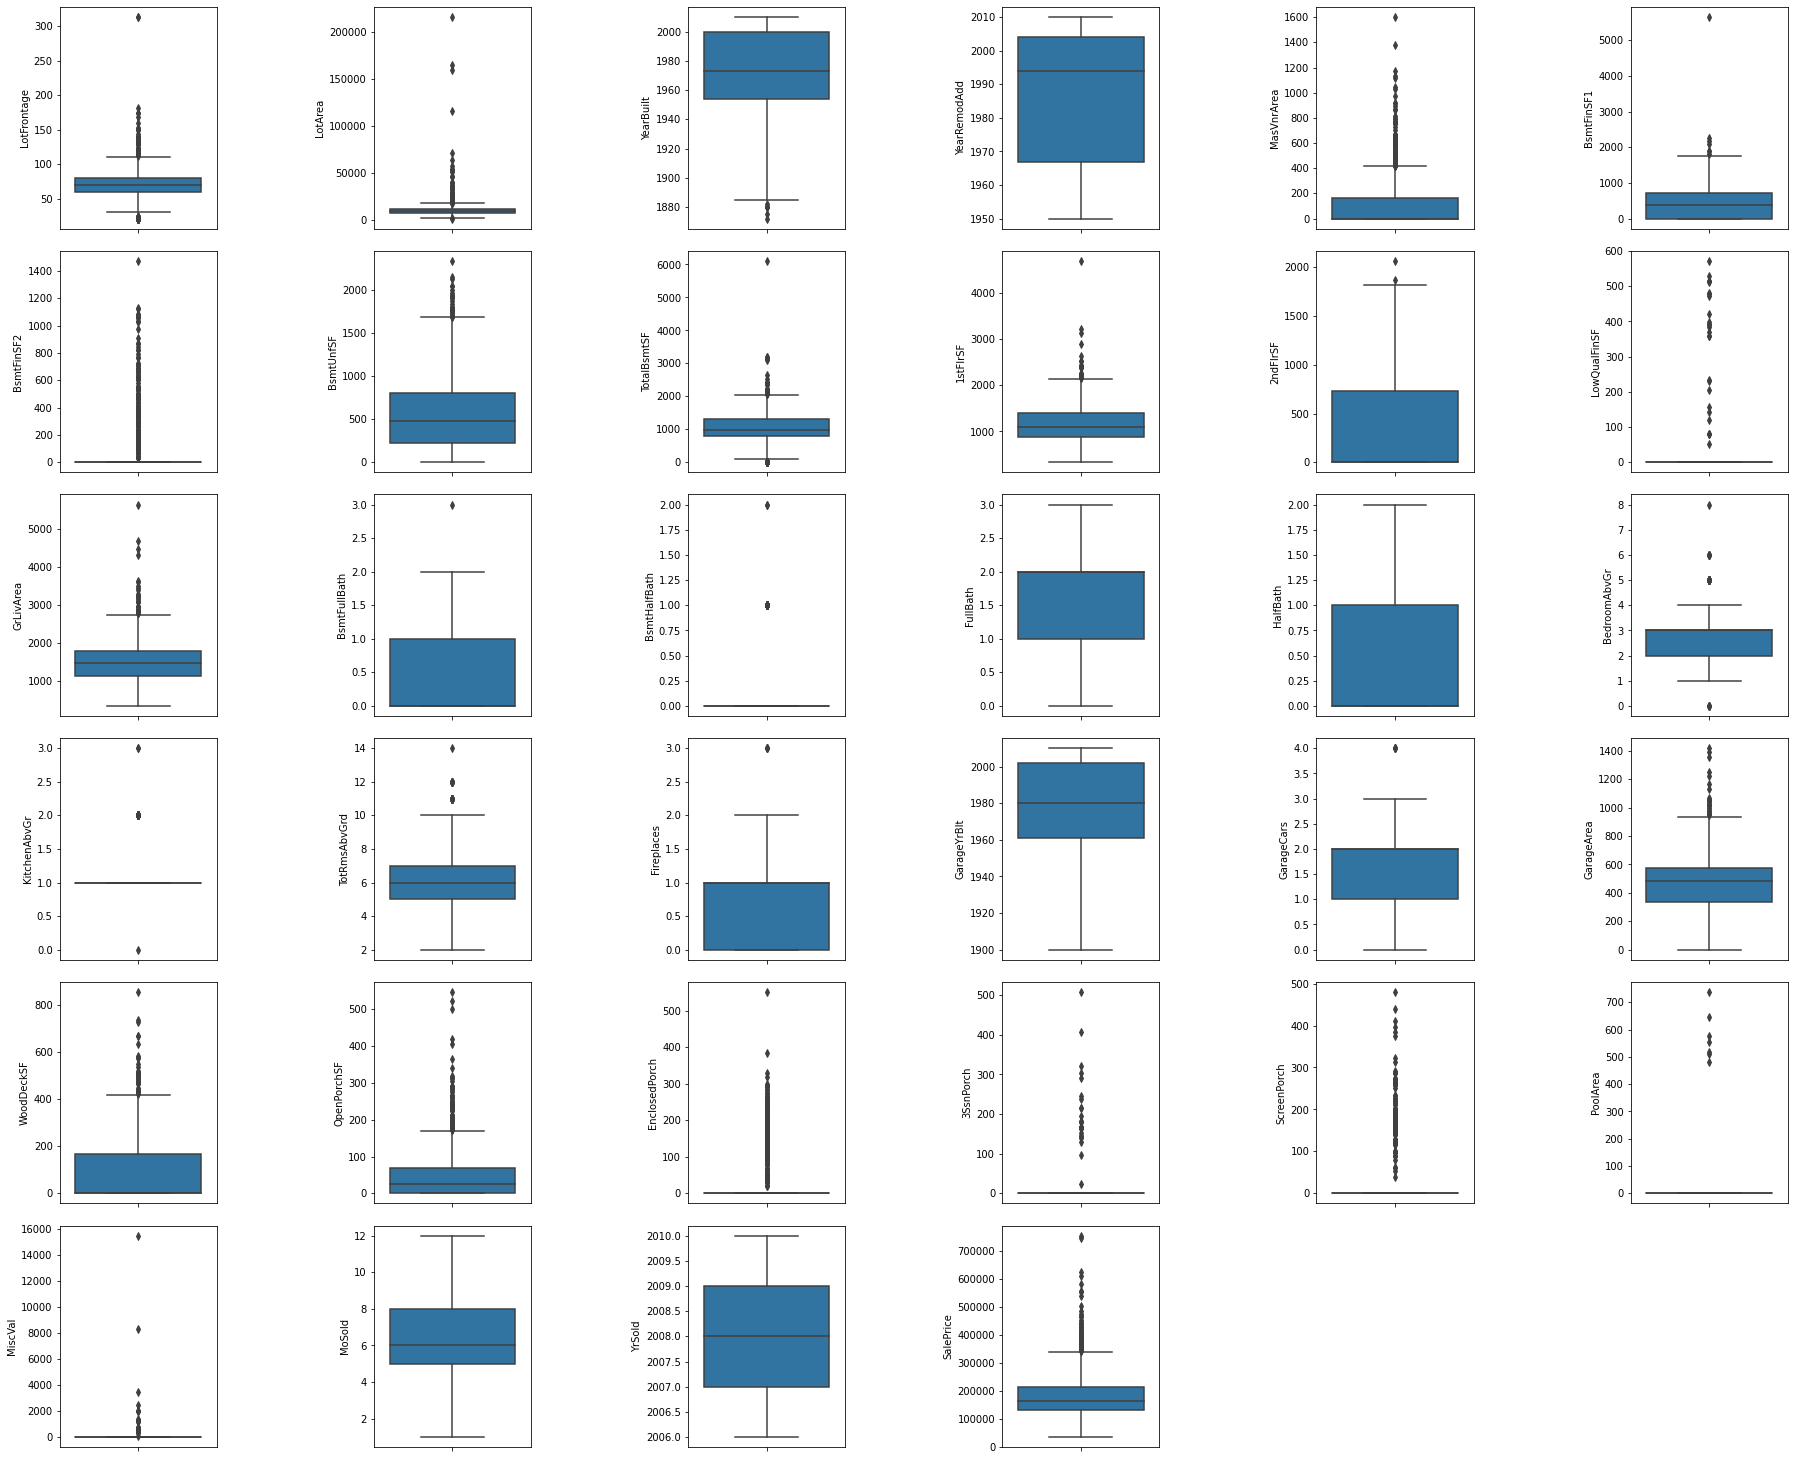

In [10]:
col=0
row=0
fig, axes = plt.subplots(math.ceil(len(num_vars)/6), 6)
for ncol in num_vars:
    sns.boxplot(data=housing_df, y=ncol, ax=axes[row][col])
    col = col + 1
    if col == 6:
        col = 0
        row = row + 1

# If number of columns not multiple of ncols, hide remaining axes
for col in range(col,6):
    axes[row, col].axis('off')

plt.subplots_adjust(left=0, bottom=0, right=4, top=5, wspace=1, hspace=0.1)
plt.show()

#### Findings:
- BsmtFinSF2 - Looks like most of the houses does not have Type 2 basement
- LowQualFinSF - Low quality houses seems almost to no
- BsmtHalfBath - Basement half bathrooms almost to 0
- EnclosedPorch - For the mose enclosed porch area is close to 0 ft
- 3SsnPorch - Three season porch area in square feet is 0 for the most
- ScreenPorch - Screen porch area in square feet as well 0 for the most
- PoolArea - Most of the house do not have pools
- Some feature variables have outliers which we need to takecare of
- Most of the houses are bulit around 1960-2000 and mostly with 1 kitchen and no pool area

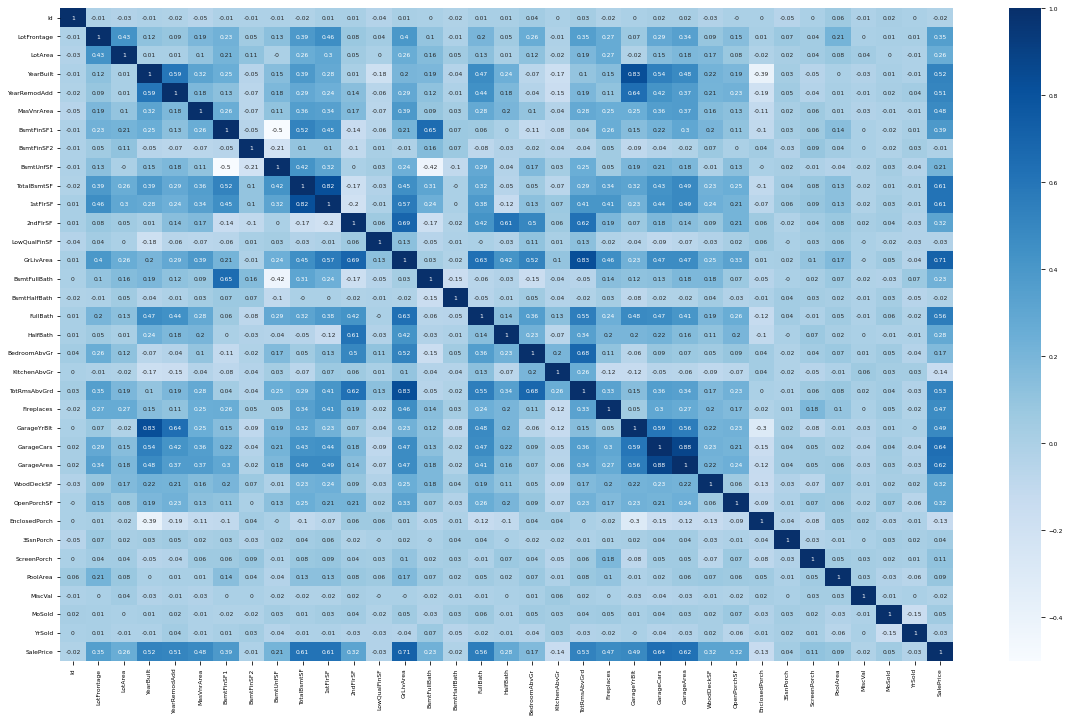

In [11]:
font = {'size': 6}
matplotlib.rc('font', **font)
plt.figure(figsize=(20,12))
sns.heatmap(round(housing_df.corr(),2), annot=True, cmap="Blues")
plt.show()

### Findings:
Looking at the heatmap following feature variables are highly correlated with Price: GarageArea, GarageCars, GarageYrBlt, FirePlaces, TotRmsAbdGrd, FullBath, GrLivArea, 1stFlrSF, TotalBsmtSF, YearRemodAdd, YearBuilt

#### Bi-variate analysis - continuous vs target variable (Price)

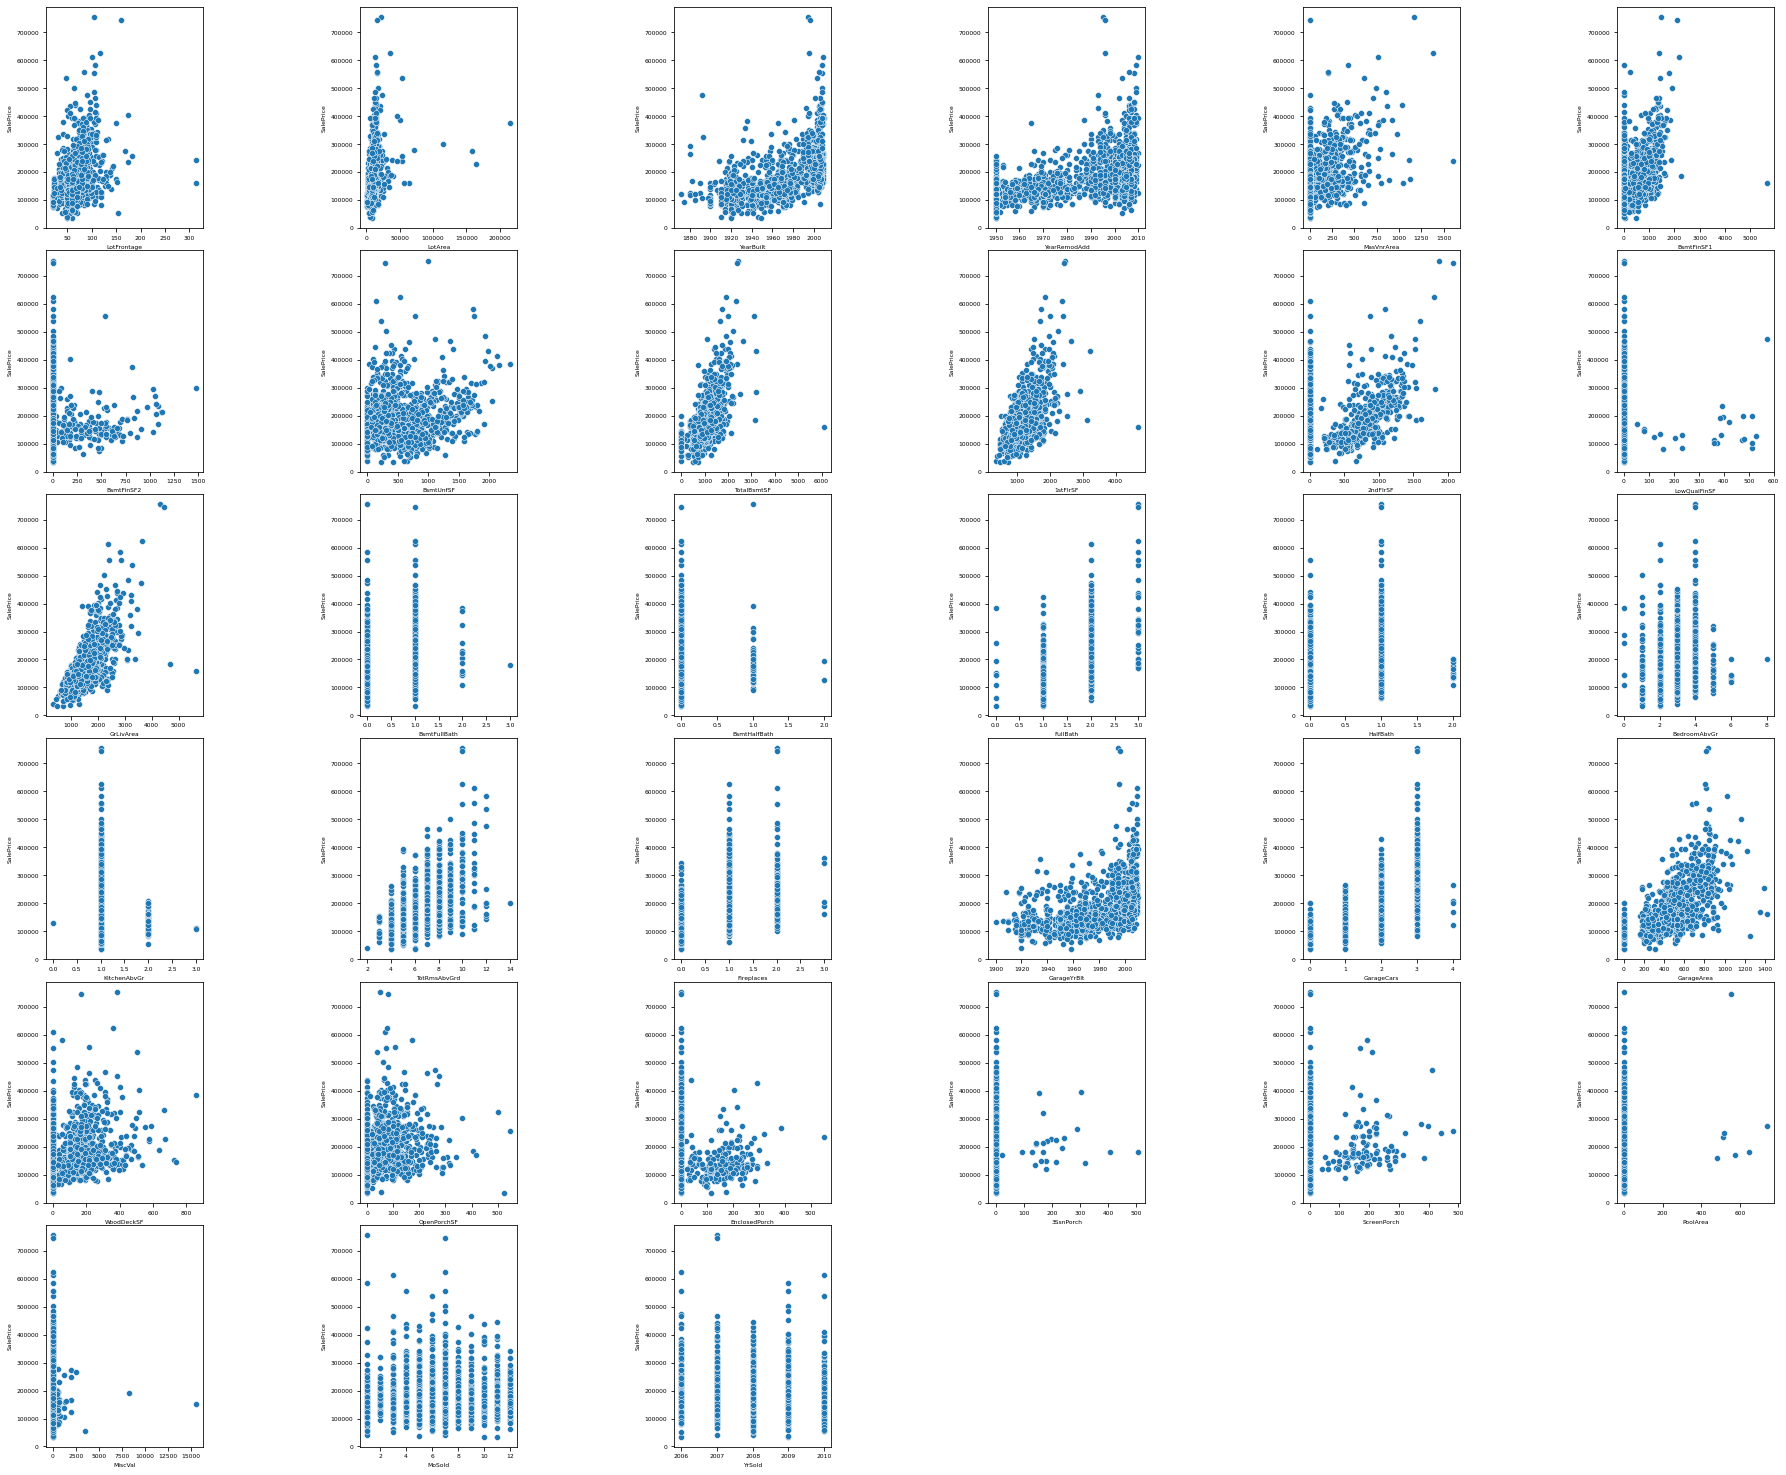

In [12]:
ind_vars = num_vars
ind_vars.remove('SalePrice')
fig, axes = plt.subplots(math.ceil(len(ind_vars)/6), 6)
col=0
row=0
for ncol in ind_vars:
    sns.scatterplot(data=housing_df, x=ncol, y='SalePrice', ax=axes[row][col])
    col =  col + 1
    if col == 6:
      col = 0
      row = row + 1
for col in range(col,6):
    axes[row, col].axis('off')

plt.subplots_adjust(left=0, bottom=0, right=4, top=5, wspace=1, hspace=0.1)
plt.show()

#### Findings:
- Sales Price has good correlation with following feature variables: GarageArea, GarageCars, GarageYrBlt, FirePlaces, TotRmsAbdGrd, FullBath, GrLivArea, 1stFlrSF, TotalBsmtSF, YearRemodAdd, YearBuilt

#### Bi-variate analysis - categorical vs target variable (Price)

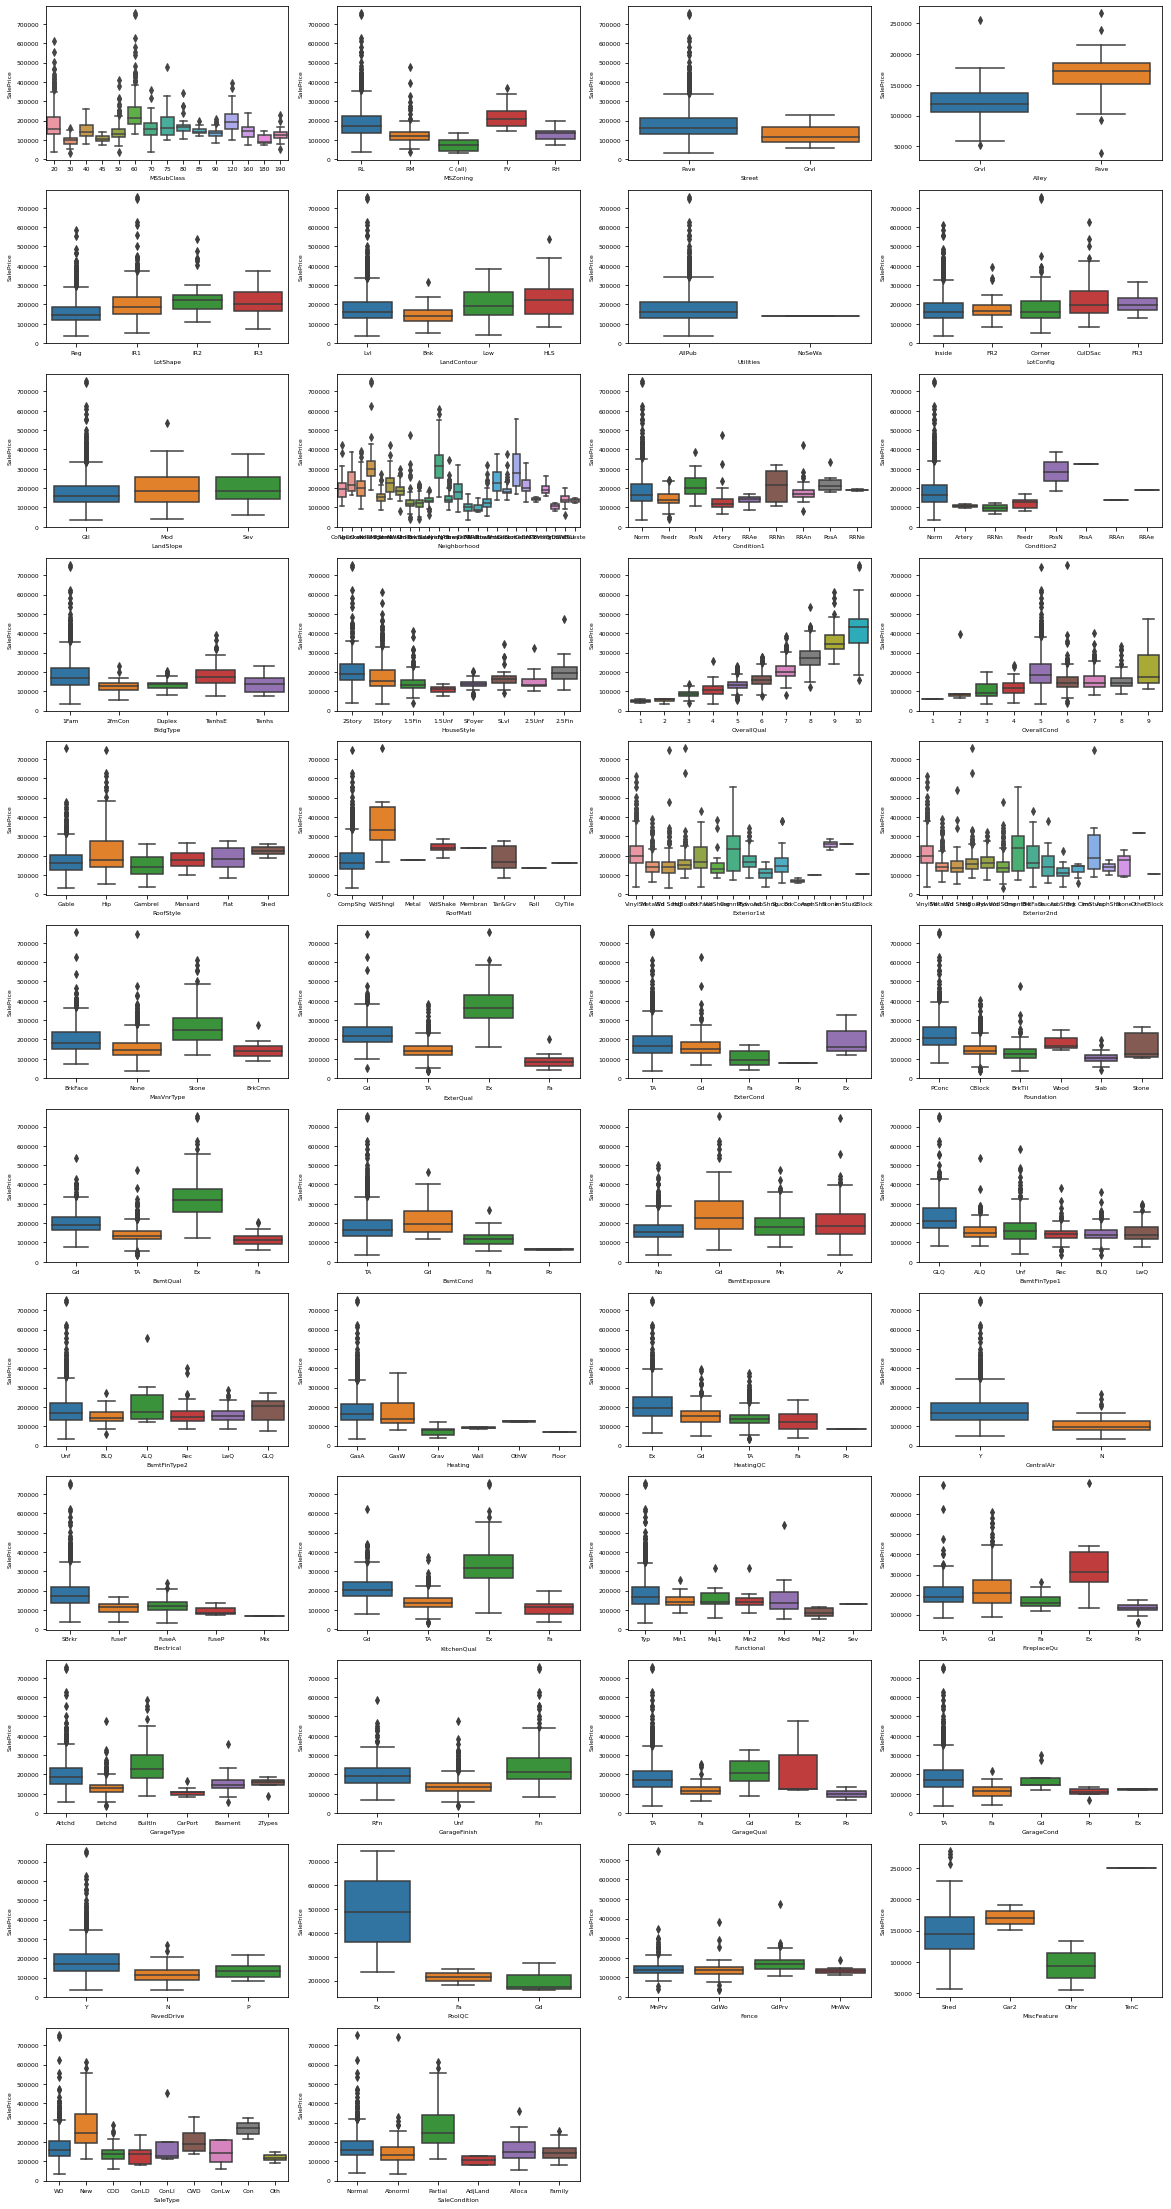

In [13]:
fig, axes = plt.subplots(12, 4, figsize=(20, 40))
for var, subplot in zip(cat_vars, axes.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=housing_df, ax=subplot)
    
for col in range(2,4):
    axes[11, col].axis('off')
plt.show()

#### Findings:
- OverAllQuality - Higher the rating higher the Prices
- PoolQC - House with excellent pool quality are with higher sale price
- Alley - Alleys with pave gain higher price
- HouseStyle - two story gain max price
- ExterQual - Excellent quality of the material on the exterior of the house has higher sale price


### 4 - Data Cleaning

In [14]:
# Checking for missing values
housing_df[housing_df.loc[:,(housing_df.isna().sum() > 0)].columns].isna().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [15]:
# Imputing missing values with Not applicable or None as per our data dictionary
NAlst = ['Alley', 'PoolQC', 'Fence', 'FireplaceQu','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2', 'GarageType','GarageFinish','GarageQual','GarageCond', 'MiscFeature']
housing_df[NAlst] = housing_df[NAlst].fillna('NA')
housing_df['MasVnrType'].fillna('None',inplace=True)

In [16]:
# All houses will have front at least a little bit of street
# Fill with mean as there might not be MasVnrArea, Lotfrontage
housing_df[['MasVnrArea','LotFrontage']] = housing_df[['MasVnrArea','LotFrontage']].fillna(housing_df[['MasVnrArea','LotFrontage']].mean())

In [17]:
# YearBuilt explains the Garage Year so safe to drop
housing_df.drop(['GarageYrBlt', 'MiscFeature'],axis=1,inplace=True)
housing_df.drop('Id',axis=1,inplace=True) # dropping index id variable

In [18]:
# Deriving new variables and dropping used variables
housing_df['Age_Year'] = housing_df['YrSold'] - housing_df['YearBuilt']
housing_df['Age_Remodel'] = housing_df['YrSold'] - housing_df['YearRemodAdd']
housing_df.drop(columns=['YrSold','YearBuilt','YearRemodAdd'],axis=1,inplace=True)

In [19]:
# Handling Outliers LotArea
Q1 = housing_df.LotArea.quantile(0.1)
Q3 = housing_df.LotArea.quantile(0.9)
IQR = Q3-Q1
housing_df = housing_df[(housing_df['LotArea'] <= (Q3 + 1.5*IQR))&(housing_df['LotArea'] >= (Q1 - 1.5*IQR))]

# Handling Outliers MasVnrArea
Q1 = housing_df['MasVnrArea'].quantile(0.1)
Q3 = housing_df['MasVnrArea'].quantile(0.9)
IQR = Q3-Q1
housing_df = housing_df[(housing_df['MasVnrArea'] <= (Q3 + 1.5*IQR))&(housing_df['MasVnrArea'] >= (Q1 - 1.5*IQR))]
housing_df.shape

(1423, 77)

### 5 - Data Preparation

In [20]:
# Split train and test data
np.random.seed(1)
df_train, df_test = train_test_split(housing_df, train_size=0.7, test_size=0.3, random_state=40)
print(df_train.shape)
print(df_test.shape)

(996, 77)
(427, 77)


In [21]:
# grouping numeric and categorical variables for easiness of plotting
num_vars = list(housing_df.select_dtypes(include=['int64','float64']).columns)
cat_vars = list(housing_df.select_dtypes(include=['category','object']).columns)

#### Data Pre-Processing
- To avoid high magnitude values impact, Scaling numerical variables using Standard Scalar technique
- Using one-hot encode for categorical features

In [22]:
preprocess_pipeline = ColumnTransformer([('numericaltransformer',StandardScaler(),num_vars),
                                         ('categorical',OneHotEncoder(drop='first',dtype=np.int64,sparse=True,handle_unknown='ignore'),cat_vars)
                                         ],remainder='passthrough')
df_train_ndarray = preprocess_pipeline.fit_transform(df_train)

In [23]:
df_train = pd.DataFrame.sparse.from_spmatrix(df_train_ndarray,columns=preprocess_pipeline.get_feature_names_out())

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Columns: 276 entries, numericaltransformer__LotFrontage to categorical__SaleCondition_Partial
dtypes: Sparse[float64, 0](276)
memory usage: 821.2 KB


In [25]:
X_columns = list(df_train.columns)
X_columns.remove('numericaltransformer__SalePrice')

### 6 - Model Building

#### Ridge Regression

In [26]:
y_train = df_train['numericaltransformer__SalePrice']
X_train = df_train[X_columns]

In [27]:
# Creating Folds
folds = KFold(n_splits=5, shuffle=True, random_state=1)

# Set Hyper parameters for tuning
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 10, 50, 100, 1000]}

model = Ridge()
model_cv = GridSearchCV(estimator=model,
                           param_grid=params,
                           scoring='r2',
                           cv=folds,
                           return_train_score=True)

model_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 1.5, 2.0,
                                   2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 10, 50,
                                   100, 1000]},
             return_train_score=True, scoring='r2')

In [28]:
# Checking parameters
print(model_cv.best_params_, model_cv.best_score_)

{'alpha': 3.5} 0.9000089247443148


In [29]:
cv_result_ridge = pd.DataFrame(model_cv.cv_results_)
cv_result_ridge

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.156886      0.028787         0.051076        0.051864       0.001   
1        0.130212      0.005088         0.021139        0.000748        0.01   
2        0.165059      0.072789         0.023151        0.002993        0.05   
3        0.125078      0.004209         0.021935        0.000885         0.1   
4        0.167373      0.081480         0.026735        0.004664         0.5   
5        0.120192      0.001684         0.021922        0.000631         1.0   
6        0.126579      0.013145         0.057495        0.070525         1.5   
7        0.122586      0.002949         0.023338        0.002327         2.0   
8        0.185641      0.105439         0.028159        0.008670         2.5   
9        0.137143      0.020212         0.024933        0.005389         3.0   
10       0.162291      0.073888         0.023730        0.005140         3.5   
11       0.120973      0.004304         0.022939        0.003091         4.0   
12       0.124316      0.014098         0.058340        0.071373         4.5   
13       0.116806      0.002784         0.022535        0.001355         5.0   
14       0.154584      0.071308         0.023145        0.003533         5.5   
15       0.117514      0.003382         0.022341        0.002413          10   
16       0.148824      0.068727         0.022546        0.001487          50   
17       0.116227      0.005155         0.022921        0.001784         100   
18       0.111016      0.001364         0.058349        0.071564        1000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 0.001}           0.860952           0.877302           0.909509   
1    {'alpha': 0.01}           0.861589           0.877640           0.909724   
2    {'alpha': 0.05}           0.864070           0.879160           0.910938   
3     {'alpha': 0.1}           0.867100           0.880151           0.912936   
4     {'alpha': 0.5}           0.878274           0.885703           0.919161   
5     {'alpha': 1.0}           0.883573           0.887868           0.921238   
6     {'alpha': 1.5}           0.886261           0.889055           0.922173   
7     {'alpha': 2.0}           0.886993           0.889987           0.922785   
8     {'alpha': 2.5}           0.887768           0.889598           0.923067   
9     {'alpha': 3.0}           0.887512           0.890163           0.923142   
10    {'alpha': 3.5}           0.887981           0.890642           0.923228   
11    {'alpha': 4.0}           0.887629           0.890809           0.923074   
12    {'alpha': 4.5}           0.886904           0.891101           0.923002   
13    {'alpha': 5.0}           0.886832           0.891411           0.922950   
14    {'alpha': 5.5}           0.886704           0.891754           0.922860   
15     {'alpha': 10}           0.884432           0.891692           0.921913   
16     {'alpha': 50}           0.867408           0.884094           0.908366   
17    {'alpha': 100}           0.857295           0.875678           0.896990   
18   {'alpha': 1000}           0.803906           0.808636           0.812233   

    split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0            0.864626  ...         0.878678        0.017143               17   
1            0.865165  ...         0.879158        0.017014               16   
2            0.867250  ...         0.881238        0.016669               15   
3            0.868859  ...         0.883231        0.016575               14   
4            0.878197  ...         0.892132        0.015555               12   
5            0.882541  ...         0.896133        0.015019               11   
6            0.883961  ...         0.898321        0.015142               10   
7            0.884597  ...         0.899034        0.015087                8   
8            0.884476  ...         0.899293        0.015244   

In [30]:
# plt.figure(figsize=(16,8))
# plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
# plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
# plt.xscale('log')
# plt.ylabel('R2 Score')
# plt.xlabel('Alpha')
# plt.show()

import plotly.express as px
fg = px.line(cv_result_ridge, x='param_alpha', y=['mean_train_score','mean_test_score'], log_x=True)
fg.show()

#### Findings:
- As lambda increases, R-Score increases until 3.5 and then its decreasing
- Optimal lambda value is λ = 3.5


In [31]:
# Building the ridge model
ridge = Ridge(alpha=3.5)
ridge.fit(X_train,y_train)

Ridge(alpha=3.5)

In [32]:
# Error term analysis
y_train_pred = ridge.predict(X_train)
residuals = y_train - y_train_pred
train_r2score = r2_score(y_train,y_train_pred)
print("Train set R2-Square is", train_r2score)

Train set R2-Square is 0.942938628021663


In [33]:
fig = px.histogram(residuals)
fig.update_xaxes(title='residuals')
fig.show()

In [34]:
fig = px.scatter(y_train_pred,residuals)
fig.update_xaxes(title='Predictions')
fig.update_yaxes(title='Residuals')
fig.show()

#### Findings:
- Residuals are normally distributed and no patterns found in the error terms

#### Ridge Regression Model Evaluation

In [35]:
df_test_ndarray = preprocess_pipeline.fit_transform(df_test)

In [36]:
df_test = pd.DataFrame.sparse.from_spmatrix(df_test_ndarray,columns=preprocess_pipeline.get_feature_names_out())
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Columns: 250 entries, numericaltransformer__LotFrontage to categorical__SaleCondition_Partial
dtypes: Sparse[float64, 0](250)
memory usage: 343.6 KB


In [37]:
print(df_train.shape)
print(df_test.shape)

(996, 276)
(427, 250)


In [38]:
train_cols = list(df_train.columns)
test_cols = list(df_test.columns)
cols_not_in_test = {c:0 for c in train_cols if c not in test_cols}
df_test = df_test.assign(**cols_not_in_test)

In [39]:
y_test = df_test['numericaltransformer__SalePrice']
X_test = df_test[X_columns]

In [40]:
y_test_pred = ridge.predict(X_test)

In [41]:
def printRegModelMetrics(y_train, y_train_pred, y_test, y_test_pred):
    r2_score_train=r2_score(y_train, y_train_pred)
    mse_train= mean_squared_error(y_train, y_train_pred)
    rmse_train = mse_train**0.5

    r2_score_test=r2_score(y_test, y_test_pred)
    mse_test= mean_squared_error(y_test,y_test_pred)
    rmse_test = mse_test**0.5

    print(f'R2-Score Train : {r2_score_train}')
    print(f'MSE Train : {mse_train}')
    print(f'RMSE Train : {rmse_train}', end='\n\n')
    print(f'R2-Score Test : {r2_score_test}')
    print(f'MSE Test : {mse_test}')
    print(f'RMSE Test : {rmse_test}')

In [42]:
printRegModelMetrics(y_train, y_train_pred, y_test, y_test_pred)

R2-Score Train : 0.942938628021663
MSE Train : 0.05706137197833701
RMSE Train : 0.23887522261284658

R2-Score Test : 0.9022166977958436
MSE Test : 0.09778330220415646
RMSE Test : 0.31270321745091856


In [43]:
# Ridge Regression Model - Top 10 Significant features
def top10SigFeatures(features, coeff):
    feature_coeff = pd.DataFrame(list(zip(features , coeff)), columns=['features','coefficient'])
    feature_coeff.features = feature_coeff.features.apply(lambda x: x.split('__')[1])
    feature_coeff=feature_coeff.sort_values(by='coefficient',ascending=False)
    return (feature_coeff[0:10],feature_coeff[0:10].to_html())

print(top10SigFeatures(ridge.feature_names_in_, ridge.coef_)[0])

                 features  coefficient
120        OverallQual_10     0.537060
119         OverallQual_9     0.510227
86   Neighborhood_StoneBr     0.377066
70   Neighborhood_Crawfor     0.275974
128         OverallCond_9     0.230106
191       BsmtExposure_Gd     0.225675
141   Exterior1st_BrkFace     0.214022
229        Functional_Typ     0.211368
10              GrLivArea     0.207712
138      RoofMatl_WdShngl     0.188312


#### Findings:
- Model Train R-Square is 0.94 and Test R-Square is 0.90
- The top 10 significant features are 
    1. OverallQual_10
    2. OverallQual_9
    3. Neighborhood_StoneBr
    4. Neighborhood_Crawfor
    5. OverallCond_9
    6. BsmtExposure_Gd
    7. Exterior1st_BrkFace
    8. Functional_Typ
    9. GrLivArea
    10. RoofMatl_WdShngl

### Lasso Regression

In [44]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 10, 50, 100, 1000]}
lasso = Lasso(tol=7e-4)
lasso_model = GridSearchCV(estimator=lasso,
                            param_grid=params,
                            cv=folds,
                            scoring='r2',
                            return_train_score=True)

lasso_model.fit(X_train,y_train)
lasso_results = pd.DataFrame(lasso_model.cv_results_)

In [45]:
# Checking parameters
print(lasso_model.best_params_, lasso_model.best_score_)

{'alpha': 0.001} 0.9073974144676742


In [46]:
fig = px.line(lasso_results,x='param_alpha',y=['mean_train_score','mean_test_score'],log_x=True)
fig.show()

#### Findings:
- As lambda increases, R-Score increases until 0.001 and then its decreasing
- Optimal lambda value is λ = 0.001

In [47]:
# Build Lasso Model
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.001)

In [48]:
y_train_pred = lasso_model.predict(X_train)

In [49]:
print('Lasso Model Train R-Score:',r2_score(y_train,y_train_pred))

Lasso Model Train R-Score: 0.9382209119350654


In [50]:
# Error term analysis
residuals = y_train - y_train_pred
fig = px.histogram(residuals)
fig.update_xaxes(title='residuals')
fig.show()

In [51]:
fig = px.scatter(y_train_pred,residuals)
fig.update_xaxes(title='Predictions')
fig.update_yaxes(title='Residuals')
fig.show()

#### Observations
- Residuals are normally distributed and no patterns found in the error terms

#### Lasso Regression Model Evaluation

In [52]:
y_test_pred = lasso_model.predict(X_test)

In [53]:
printRegModelMetrics(y_train, y_train_pred, y_test, y_test_pred)

R2-Score Train : 0.9382209119350654
MSE Train : 0.061779088064934574
RMSE Train : 0.2485539942646961

R2-Score Test : 0.9025881083125156
MSE Test : 0.09741189168748443
RMSE Test : 0.3121087818173087


In [54]:
print(top10SigFeatures(lasso_model.feature_names_in_,lasso_model.coef_)[0])

                 features  coefficient
120        OverallQual_10     1.300821
119         OverallQual_9     1.006531
86   Neighborhood_StoneBr     0.397361
10              GrLivArea     0.363124
70   Neighborhood_Crawfor     0.351231
267          SaleType_New     0.324428
118         OverallQual_8     0.316113
128         OverallCond_9     0.252729
141   Exterior1st_BrkFace     0.245535
229        Functional_Typ     0.217962


#### Findings:
- Lasso Model Train R-Score: 0.94 and Test R-Score: 0.92
- Top 10 Significant features:
    1. OverallQual_10
    2. OverallQual_9
    3. Neighborhood_StoneBr
    4. GrLivArea
    5. Neighborhood_Crawfor
    6. SaleType_New
    7. OverallQual_8
    8. OverallCond_9
    9. Exterior1st_BrkFace
    10. Functional_Typ
    

### Conclusion:
- Ridge model optimal lambda λ = 3.5
- Lasso Model optimal lambda λ = 0.001
- Ridge Model Train R-Square: 0.94 and Test R-Square: 0.90
- Lasso Model Train R-Square: 0.94 and Test R-Square: 0.90
#### Both Ridge and Lasso perform almost equally, since lasso can help in feature elimination and model may be more robust hence we are going to consider Lasso.

#### Top 10 Significant features
<table>
    <thead>
        <tr style="background: #72A0C1; color: #fff; font-weight: 600;">
            <th>Features</th>	
            <th>Coefficient</th>
        </tr>
    </thead>
    <tbody>
        <tr><td>OverallQual_10</td><td>1.300821<td></tr>
        <tr><td>OverallQual_9</td><td>1.006531<td></tr>
        <tr><td>Neighborhood_StoneBr</td><td>0.397361<td></tr>
        <tr><td>GrLivArea</td><td>0.363124<td></tr>
        <tr><td>Neighborhood_Crawfor</td><td>0.351231<td></tr>
        <tr><td>SaleType_New</td><td>0.324428<td></tr>
        <tr><td>OverallQual_8</td><td>0.316113<td></tr>
        <tr><td>OverallCond_9</td><td>0.252729<td></tr>
        <tr><td>Exterior1st_BrkFace</td><td>0.245535<td></tr>
        <tr><td>Functional_Typ</td><td>0.217962<td></tr>
    </tbody>
</table>

### Assignment Part-II

In [55]:
# Double the alpha for ridge and Lasso regreesion as 7 and 0.002 respectively

ridge = Ridge(alpha=7)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
printRegModelMetrics(y_train,y_train_pred,y_test,y_test_pred)

R2-Score Train : 0.9390331980424388
MSE Train : 0.060966801957561156
RMSE Train : 0.24691456408555806

R2-Score Test : 0.9051694325762087
MSE Test : 0.09483056742379124
RMSE Test : 0.30794572155461303


In [57]:
print(top10SigFeatures(ridge.feature_names_in_, ridge.coef_)[0])

                 features  coefficient
119         OverallQual_9     0.432707
120        OverallQual_10     0.374826
86   Neighborhood_StoneBr     0.297627
70   Neighborhood_Crawfor     0.254836
191       BsmtExposure_Gd     0.209994
10              GrLivArea     0.209089
229        Functional_Typ     0.205748
128         OverallCond_9     0.198385
141   Exterior1st_BrkFace     0.186421
267          SaleType_New     0.159200


In [56]:
lasso = Lasso(alpha=0.002)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
printRegModelMetrics(y_train,y_train_pred,y_test,y_test_pred)

R2-Score Train : 0.9314450354293667
MSE Train : 0.06855496457063329
RMSE Train : 0.2618300299252041

R2-Score Test : 0.9008386854972114
MSE Test : 0.09916131450278867
RMSE Test : 0.31489889568366014


In [58]:
print(top10SigFeatures(lasso.feature_names_in_, lasso.coef_)[0])

                 features  coefficient
120        OverallQual_10     1.117244
119         OverallQual_9     0.935879
10              GrLivArea     0.380450
70   Neighborhood_Crawfor     0.341596
267          SaleType_New     0.322407
86   Neighborhood_StoneBr     0.303214
118         OverallQual_8     0.266360
229        Functional_Typ     0.233984
141   Exterior1st_BrkFace     0.223832
191       BsmtExposure_Gd     0.164909


In [60]:
# dropping top 5 model predictors and create a new model for new predictor vairables
X_train_new = X_train.drop(['categorical__OverallQual_10', 'categorical__OverallQual_9','categorical__Neighborhood_StoneBr', 
                            'numericaltransformer__GrLivArea' ,'categorical__Neighborhood_Crawfor'],axis=1)
X_test_new = X_test.drop(['categorical__OverallQual_10', 'categorical__OverallQual_9','categorical__Neighborhood_StoneBr', 
                            'numericaltransformer__GrLivArea' ,'categorical__Neighborhood_Crawfor'],axis=1)

In [61]:
lasso_new = Lasso(alpha=0.001)
lasso_new.fit(X_train_new,y_train)
print(top10SigFeatures(lasso_new.feature_names_in_,lasso_new.coef_)[0])

                features  coefficient
8               2ndFlrSF     0.342809
123        OverallCond_9     0.338095
7               1stFlrSF     0.283255
262         SaleType_New     0.281801
136  Exterior1st_BrkFace     0.253989
133     RoofMatl_WdShngl     0.242375
224       Functional_Typ     0.236403
186      BsmtExposure_Gd     0.212571
121        OverallCond_7     0.186507
122        OverallCond_8     0.160477
